# Week 11 Challenge Document

Time Series Forecasting for Portfolio Management Optimization


## Install and import libraries

### Subtask:
Install necessary libraries such as `yfinance`, `pandas`, `numpy`, `matplotlib`, and time series forecasting libraries like `statsmodels` or `prophet`.


**Reasoning**:
The subtask requires installing several libraries and importing them. I will use `pip install` to install the libraries and then import them in a single code block.



In [1]:
%pip install yfinance pandas numpy matplotlib statsmodels prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from prophet import Prophet

### Fetch Data

Use `yfinance` to download historical financial data for selected assets (e.g., stocks, indices).

In [2]:
# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2020-01-01'
end_date = '2023-12-31'

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date)

# Display the first few rows
display(data.head())

/tmp/ipython-input-1419419857.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2020-01-02  71.555878  299.406464  28.684000  71.675180  299.424914   
2020-01-03  71.811546  297.139221  29.534000  71.828593  298.272823   
2020-01-06  71.726303  298.272827  30.102667  71.845605  298.355769   
2020-01-07  71.666656  297.434174  31.270666  71.751871  298.180683   
2020-01-08  71.555878  299.019348  32.809334  71.751871  300.245089   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2020-01-02  28.713333  71.521791  297.249878  28.114000  71.564401   
2020-01-03  30.266666  71.666681  295.931902  29.128000  71.734855   
2020-01-06  30.104000  71.675176  295.249889  29.333332  71.837088   
2020-01-07  31.441999  71.641093  296.982561  30.224001  71.751871   
2020-01-08  33.232666  71.496227  297.378867  31.215334  71.692220   

Price                               Volume                       
Ticker             SPY       TSLA      BND       SPY       TSLA  
Date                                                             
2020-01-02  298.180722  28.299999  5511000  59151200  142981500  
2020-01-03  295.987197  29.366667  5368300  77709700  266677500  
2020-01-06  295.369704  29.364668  3710400  55653900  151995000  
2020-01-07  297.701423  30.760000  3029900  40496400  268231500  
2020-01-08  297.627694  31.580000  3674400  68296000  467164500

### Preprocess Data

Clean and preprocess the data, handling missing values, and ensuring the data is in a suitable format for time series analysis.

In [3]:
# Use the 'Close' price for analysis
close_prices = data['Close']

# Check for missing values
print("Missing values per ticker:\n", close_prices.isnull().sum())

# Handle missing values (e.g., forward fill)
close_prices = close_prices.fillna(method='ffill')

# Check again for missing values
print("\nMissing values after filling:\n", close_prices.isnull().sum())

# Display data types
print("\nData types:\n", close_prices.dtypes)

# Check basic statistics
display(close_prices.describe())

Missing values per ticker:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

Missing values after filling:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

Data types:
 Ticker
BND     float64
SPY     float64
TSLA    float64
dtype: object


/tmp/ipython-input-957986356.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices = close_prices.fillna(method='ffill')


Ticker,BND,SPY,TSLA
count,1006.000000,1006.000000,1006.000000
mean,71.523973,376.901859,209.126371
std,4.354536,53.764238,85.797682
min,62.950890,206.683273,24.081333
25%,67.329897,346.438492,160.210003
50%,72.755482,389.920593,223.489998
75%,75.652346,418.775047,262.967491
max,77.318253,467.858093,409.970001


### Exploratory Data Analysis (EDA)

Perform exploratory data analysis to identify trends, seasonality, and other patterns in the financial data.

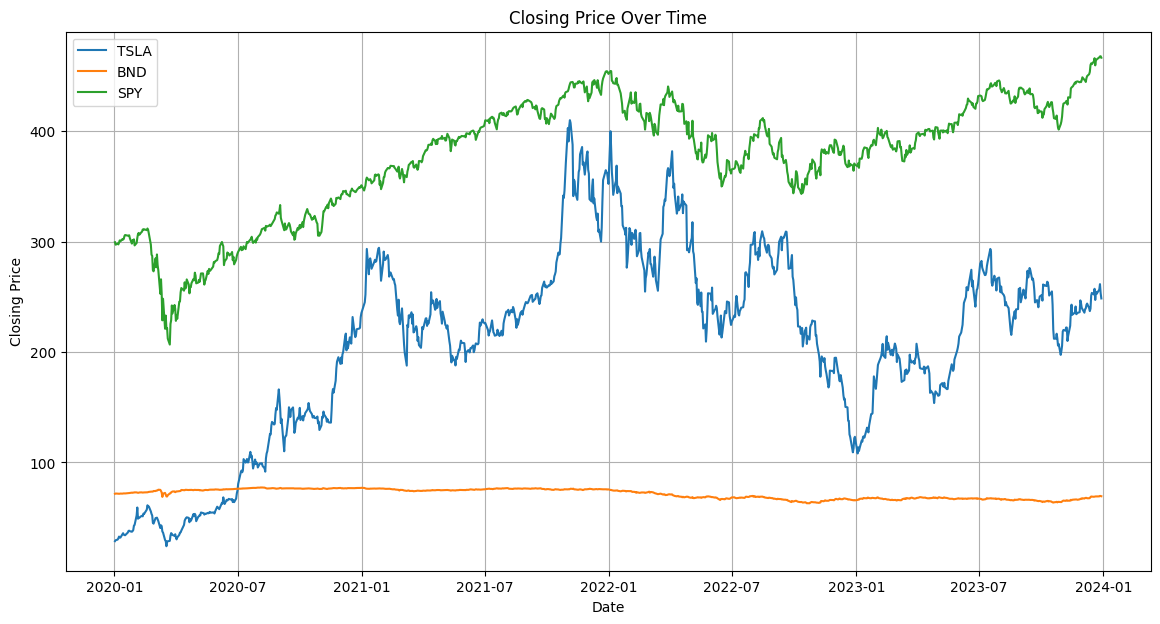

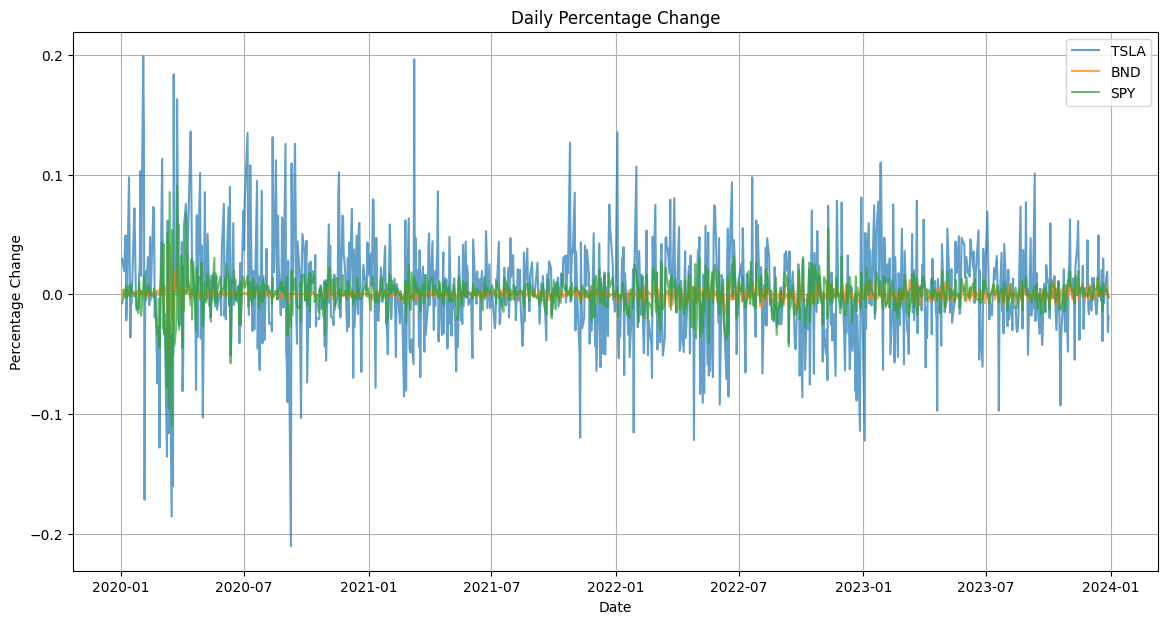

In [4]:
# Visualize the closing price over time
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(close_prices.index, close_prices[ticker], label=ticker)
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily percentage change
daily_returns = close_prices.pct_change().dropna()

# Plot daily percentage change
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

### Analyze Volatility and Seasonality

Analyze volatility by calculating rolling means and standard deviations and perform statistical tests for stationarity.

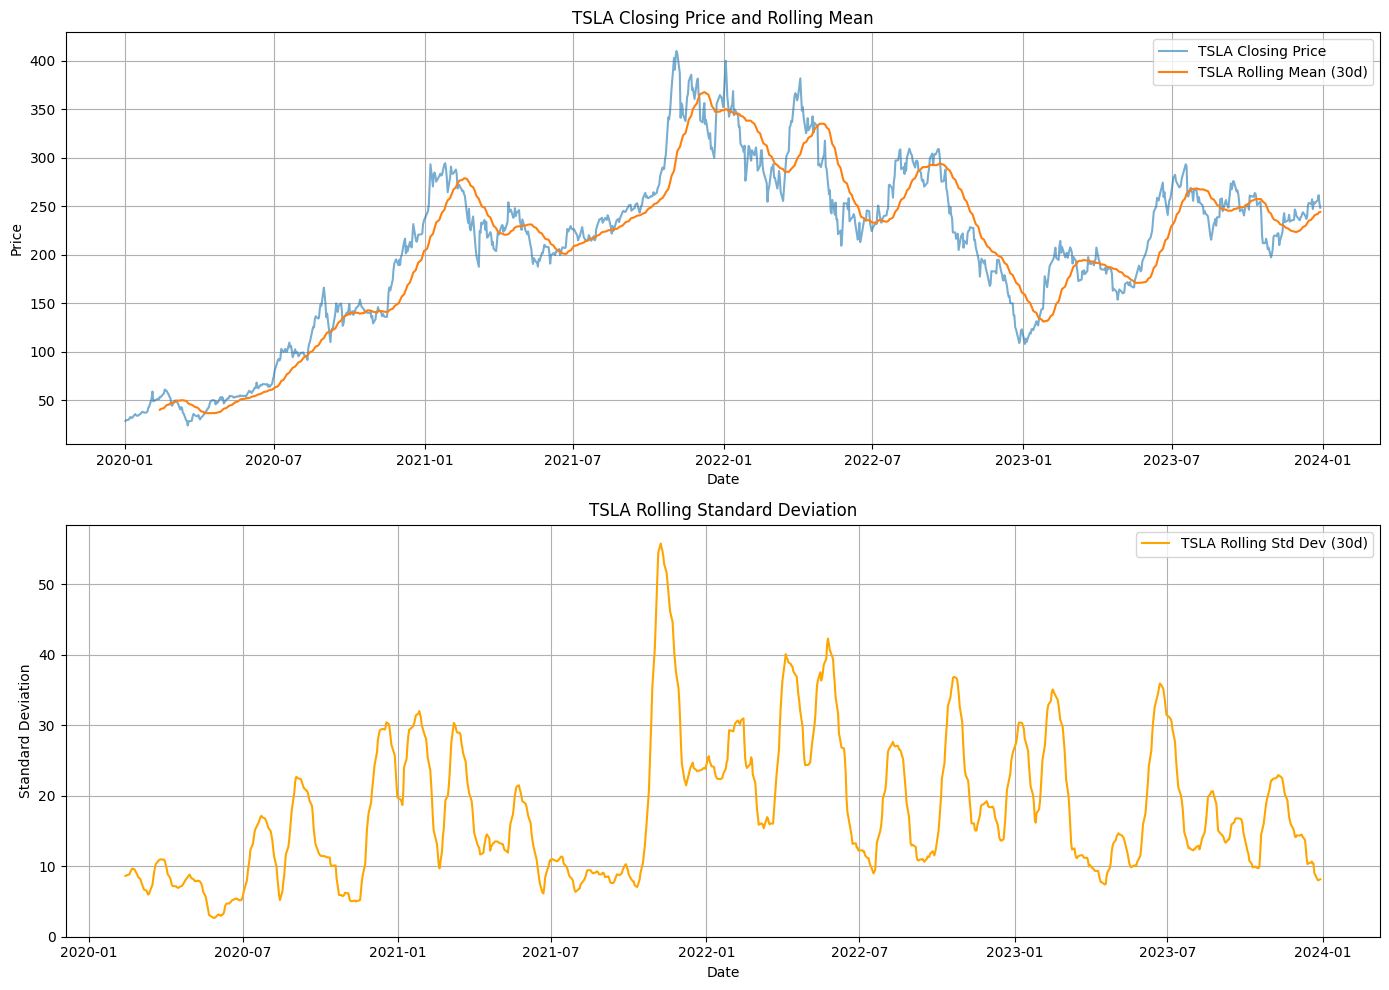

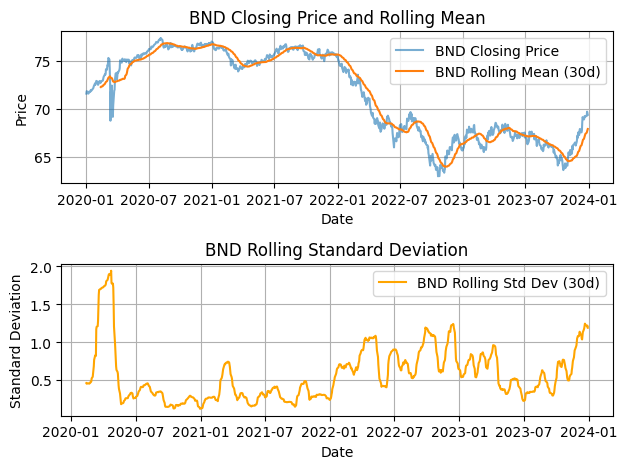

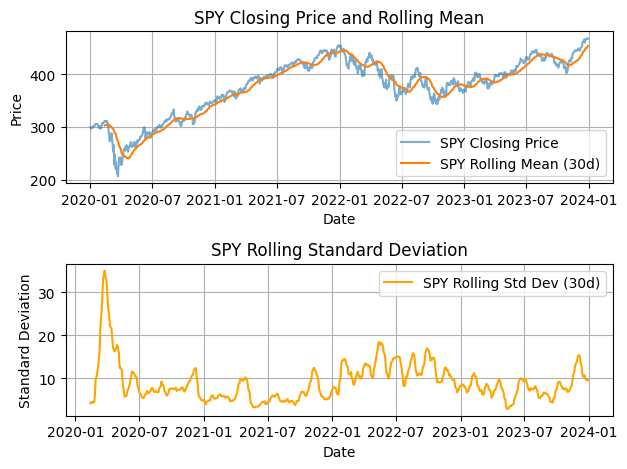


Augmented Dickey-Fuller test results:

TSLA ADF Statistic: -2.407545176977963
TSLA p-value: 0.13961815309788117
TSLA Critical Values:
   1%: -3.4369325637409154
   5%: -2.8644462162311934
   10%: -2.568317409920808
TSLA is likely non-stationary.

BND ADF Statistic: -0.9866880769995318
BND p-value: 0.7580885023514937
BND Critical Values:
   1%: -3.4369193380671
   5%: -2.864440383452517
   10%: -2.56831430323573
BND is likely non-stationary.

SPY ADF Statistic: -1.2411720082244169
SPY p-value: 0.6556386671730152
SPY Critical Values:
   1%: -3.4369325637409154
   5%: -2.8644462162311934
   10%: -2.568317409920808
SPY is likely non-stationary.


In [5]:
# Calculate rolling mean and standard deviation
rolling_mean = close_prices.rolling(window=30).mean()
rolling_std = close_prices.rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(14, 10))
for ticker in tickers:
    plt.subplot(2, 1, 1)
    plt.plot(close_prices.index, close_prices[ticker], label=f'{ticker} Closing Price', alpha=0.6)
    plt.plot(rolling_mean.index, rolling_mean[ticker], label=f'{ticker} Rolling Mean (30d)')
    plt.title(f'{ticker} Closing Price and Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(rolling_std.index, rolling_std[ticker], label=f'{ticker} Rolling Std Dev (30d)', color='orange')
    plt.title(f'{ticker} Rolling Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Perform Augmented Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

print("\nAugmented Dickey-Fuller test results:")
for ticker in tickers:
    result = adfuller(close_prices[ticker].dropna())
    print(f"\n{ticker} ADF Statistic: {result[0]}")
    print(f"{ticker} p-value: {result[1]}")
    print(f"{ticker} Critical Values:")
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print(f"{ticker} is likely stationary.")
    else:
        print(f"{ticker} is likely non-stationary.")

### Analyze Risk Metrics

Calculate foundational risk metrics like Value at Risk (VaR) and the Sharpe Ratio.

In [6]:
# Calculate Value at Risk (VaR)
# Assuming a normal distribution for returns
confidence_level = 0.95
VaR = daily_returns.quantile(1 - confidence_level)

print(f"\nValue at Risk (VaR) at {confidence_level*100}% confidence level:\n", VaR)

# Calculate Sharpe Ratio
# Assuming risk-free rate is 0 for simplicity
# Annualize Sharpe Ratio (assuming 252 trading days in a year)
annualized_sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)

print("\nAnnualized Sharpe Ratio:\n", annualized_sharpe_ratio)


Value at Risk (VaR) at 95.0% confidence level:
 Ticker
BND    -0.006217
SPY    -0.020377
TSLA   -0.064069
Name: 0.050000000000000044, dtype: float64

Annualized Sharpe Ratio:
 Ticker
BND    -0.069835
SPY     0.605199
TSLA    1.135868
dtype: float64


### Additional Visualizations

Let's add some more visualizations to further explore the data.

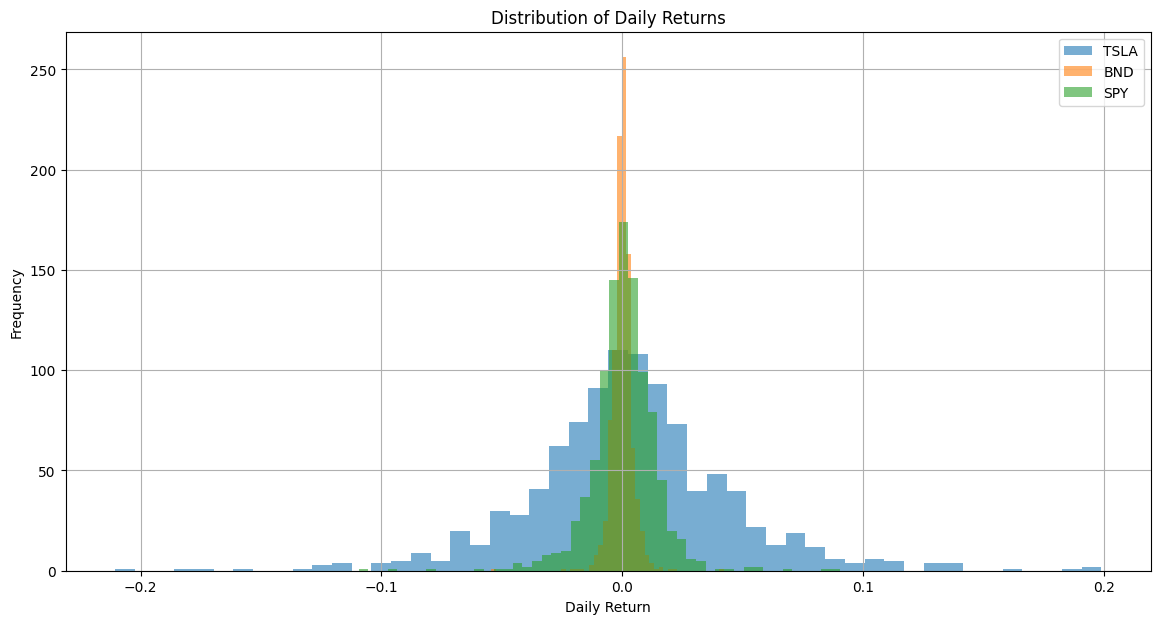

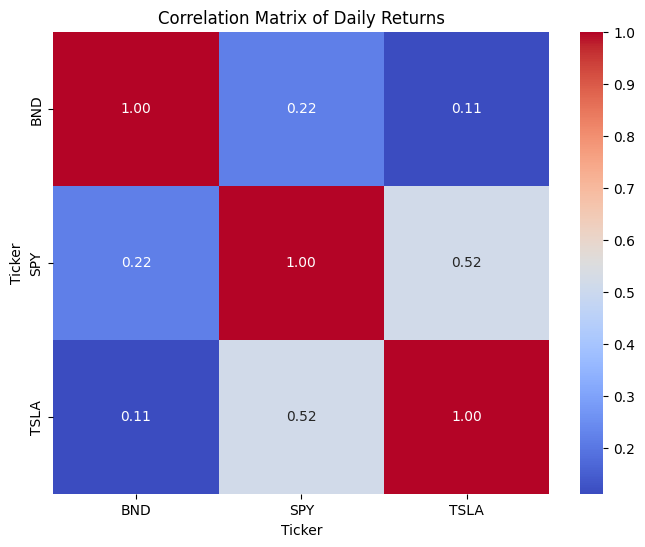

In [7]:
# Plot the distribution of daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    daily_returns[ticker].hist(bins=50, alpha=0.6, label=ticker)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot a correlation matrix of daily returns
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()

### Save Data to CSV

In [8]:
# Save the DataFrame to a CSV file
data.to_csv('financial_data.csv')

print("DataFrame saved to financial_data.csv")

DataFrame saved to financial_data.csv
